# Investissement basé sur la corrélation entre des matières première (crops : soja, maïs, avoine, blé) et le pétrole.

## Import des modules
Pour les modules un environnement venv est normalement fournis avec le code et les data_set, celui ci est équipé des modules requis, dans le cas contraire veuillez implémenter (via pip ou conda) les modules nécessaires dans leur dernière version

In [26]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 27 18:21:02 2024
@author: THOMAS Nicolas, STRIEBIG Maximilien, THOMASSIN Pablo
"""

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime

## Chargement des fichiers 
L'enssemble des fichiers et fournis dans le dossier, l'enssemble de ces données proviennent du site : https://www.investing.com/


In [27]:
# CSV file reading------------------------------------------------------
wheat = pd.read_csv(r"Future_Blé_US.csv")
, header=None, skiprows=1)
wheat.columns = ['Date', 'Valeur1', 'Valeur2', 'Valeur3', 'Valeur4', 'Valeur5', 'Variation']
wheat = wheat.dropna(subset=['Date'])  # Supprimer les lignes avec des dates manquantes
wheat = wheat[::-1]
wheat.reset_index(drop=True, inplace=True)

oats = pd.read_csv(r"Future_Avoine.csv"
, header=None, skiprows=1)
oats.columns = ['Date', 'Valeur1', 'Valeur2', 'Valeur3', 'Valeur4', 'Valeur5', 'Variation']
oats = oats.dropna(subset=['Date'])
oats = oats[::-1]
oats.reset_index(drop=True, inplace=True)

soy = pd.read_csv(r"Future_Soja_US.csv"
, header=None, skiprows=1)
soy.columns = ['Date', 'Valeur1', 'Valeur2', 'Valeur3', 'Valeur4', 'Valeur5', 'Variation']
soy = soy.dropna(subset=['Date'])
soy = soy[::-1]
soy.reset_index(drop=True, inplace=True)

corn = pd.read_csv(r"Future_Maïs_US.csv"
, header=None, skiprows=1)
corn.columns = ['Date', 'Valeur1', 'Valeur2', 'Valeur3', 'Valeur4', 'Valeur5', 'Variation']
corn = corn.dropna(subset=['Date'])
corn = corn[::-1]
corn.reset_index(drop=True, inplace=True)

WTI = pd.read_csv(r"Future_Pétrole_Brut_WTI.csv"
, header=None, skiprows=1)
WTI.columns = ['Date', 'Valeur1', 'Valeur2', 'Valeur3', 'Valeur4', 'Valeur5', 'Variation']
WTI = WTI.dropna(subset=['Date'])
WTI = WTI[::-1]
WTI.reset_index(drop=True, inplace=True)

brent = pd.read_csv(r"Future_Pétrole_Brent.csv"
, header=None, skiprows=1)
brent.columns = ['Date', 'Valeur1', 'Valeur2', 'Valeur3', 'Valeur4', 'Valeur5', 'Variation']
brent = brent.dropna(subset=['Date'])
brent = brent[::-1]
brent.reset_index(drop=True, inplace=True)


## Data Processing 

Dans cette partie du code, on s'assure de la qualité des données utilisés, pour cela on vérifie l'abscence de données, mais aussi leur type. Par la suite on filtre les lignes en les triant par date, puis le scrapping effectué étant un string on lui redonne un data_type cohérent par rapport à l'utilisation future des données.

In [28]:
# Data processing------------------------------------------------------


# Conversion of the 'Date' column into datetime format
wheat['Date'] = pd.to_datetime(wheat['Date'], format='%d/%m/%Y')
corn['Date'] = pd.to_datetime(corn['Date'], format='%d/%m/%Y')
oats['Date'] = pd.to_datetime(oats['Date'], format='%d/%m/%Y')
soy['Date'] = pd.to_datetime(soy['Date'], format='%d/%m/%Y')
brent['Date'] = pd.to_datetime(brent['Date'], format='%d/%m/%Y')
WTI['Date'] = pd.to_datetime(WTI['Date'], format='%d/%m/%Y')
#%%
common_dates = set(wheat['Date']).intersection(set(oats['Date'])).intersection(set(soy['Date'])).intersection(set(corn['Date'])).intersection(set(WTI['Date'])).intersection(set(brent['Date']))

# Filtering rows for each DataFrame
wheat = wheat[wheat['Date'].isin(common_dates)]
corn = corn[corn['Date'].isin(common_dates)]
oats = oats[oats['Date'].isin(common_dates)]
soy = soy[soy['Date'].isin(common_dates)]
brent = brent[brent['Date'].isin(common_dates)]
WTI = WTI[WTI['Date'].isin(common_dates)]

# Resetting indexes for each DataFrame
wheat.reset_index(drop=True, inplace=True)
corn.reset_index(drop=True, inplace=True)
oats.reset_index(drop=True, inplace=True)
soy.reset_index(drop=True, inplace=True)
brent.reset_index(drop=True, inplace=True)
WTI.reset_index(drop=True, inplace=True)

# Conversion of numeric values in the 'Valeur1' column (currently in string format with a comma as decimal separator)
wheat['Valeur1'] = wheat['Valeur1'].str.replace('.', '').str.replace(',', '.').astype(float)
corn['Valeur1'] = corn['Valeur1'].str.replace('.', '').str.replace(',', '.').astype(float)
oats['Valeur1'] = oats['Valeur1'].str.replace('.', '').str.replace(',', '.').astype(float)
soy['Valeur1'] = soy['Valeur1'].str.replace('.', '').str.replace(',', '.').astype(float)
brent['Valeur1'] = brent['Valeur1'].str.replace('.', '').str.replace(',', '.').astype(float)
WTI['Valeur1'] = WTI['Valeur1'].str.replace('.', '').str.replace(',', '.').astype(float)

## Première visualisation

Dans cees graphiques vous pouvez observer à l'aide des données historique directement le prix de nos produit.

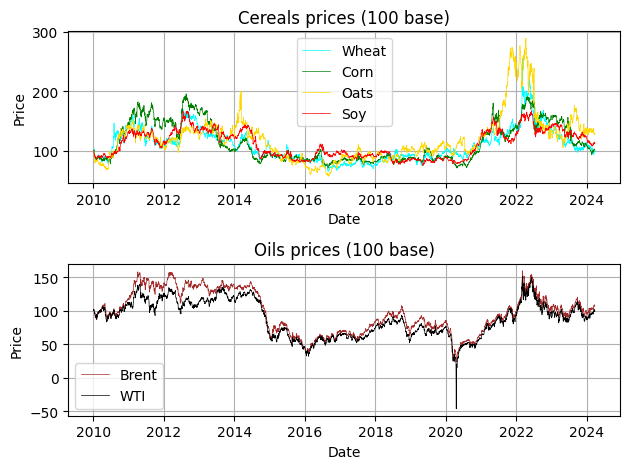

In [29]:
#%% Graphics
plt.subplot(2,1,1)
plt.title("Cereals prices (100 base)")
plt.plot(wheat['Date'], 100*wheat['Valeur1']/wheat['Valeur1'][0], linewidth=0.5, label="Wheat", color="cyan")
plt.plot(wheat['Date'], 100*corn['Valeur1']/corn['Valeur1'][0], linewidth=0.5, label="Corn", color="green")
plt.plot(wheat['Date'], 100*oats['Valeur1']/oats['Valeur1'][0], linewidth=0.5, label="Oats", color="gold")
plt.plot(wheat['Date'], 100*soy['Valeur1']/soy['Valeur1'][0], linewidth=0.5, label="Soy", color="red")
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.legend()
plt.subplot(2,1,2)
plt.title("Oils prices (100 base)")
plt.plot(wheat['Date'], 100*brent['Valeur1']/brent['Valeur1'][0], linewidth=0.5, label="Brent", color="brown")
plt.plot(wheat['Date'], 100*WTI['Valeur1']/WTI['Valeur1'][0], linewidth=0.5, label="WTI", color="black")
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

## Calcul de la matrice de corrélation
Ici nous allons donc regarder si effectivements les cultures selectionnées sont bien corrélé avec le prix du pétrole, et dans quel sens la corrélation est impactante.

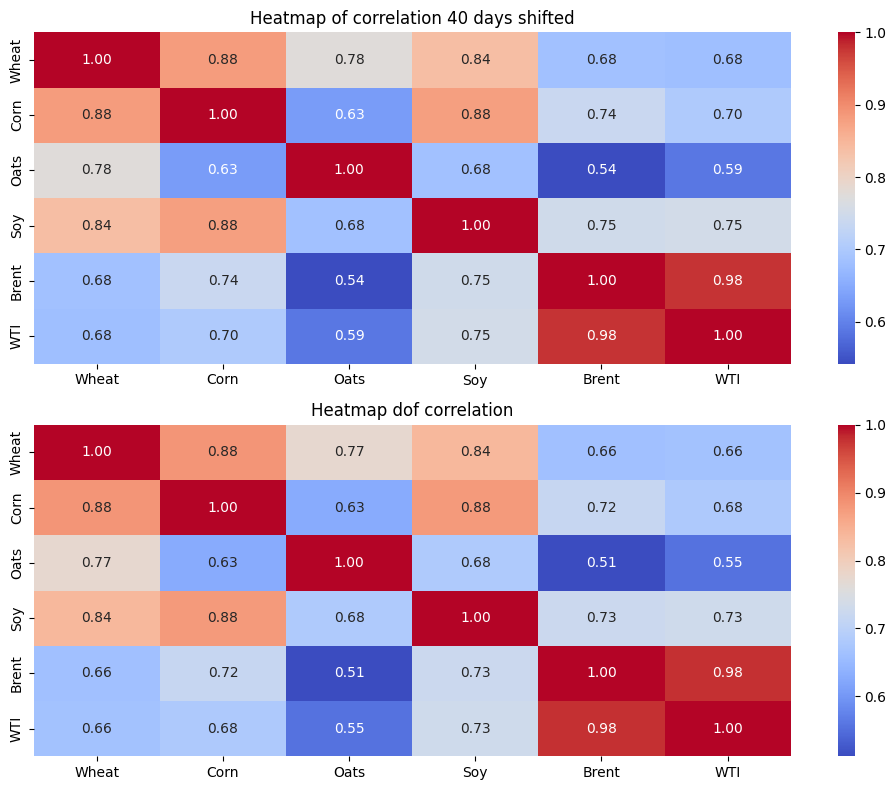

In [30]:
#%% Correlation
data = {
    'Wheat': wheat['Valeur1'],
    'Corn': corn['Valeur1'],
    'Oats': oats['Valeur1'],
    'Soy': soy['Valeur1'],
    'Brent': brent['Valeur1'],
    'WTI': WTI['Valeur1']
}

df = pd.DataFrame(data)
correlation_matrix = df.corr()

shift = 40
data_shift = {
    'Wheat': wheat['Valeur1'].shift(shift),
    'Corn': corn['Valeur1'].shift(shift),
    'Oats': oats['Valeur1'].shift(shift),
    'Soy': soy['Valeur1'].shift(shift),
    'Brent': brent['Valeur1'],
    'WTI': WTI['Valeur1']
}

df_shift = pd.DataFrame(data_shift)


correlation_matrix_shifted = df_shift.corr()

plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
sns.heatmap(correlation_matrix_shifted, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(f'Heatmap of correlation {shift} days shifted')
plt.subplot(2, 1, 2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap dof correlation')
plt.tight_layout()
plt.show()



## Création de l'indice et réplication

Maintenant nous allons définir notre indice pour pouvoir répliquer d'une part l'évolution du cours total de nos cultures et d'autre part le cours total du pétrole

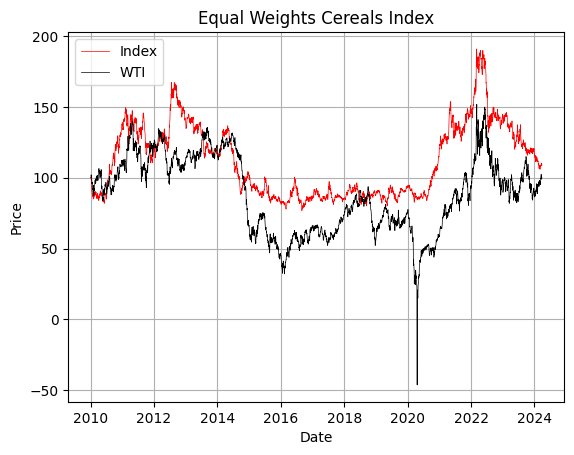

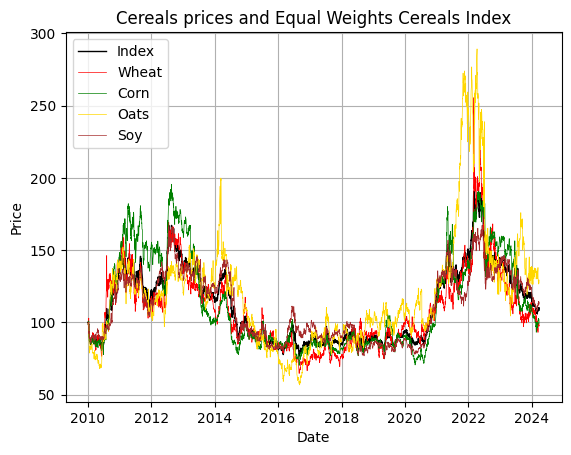

In [31]:
cereals = corn['Valeur1']/4 +wheat['Valeur1']/4 +soy['Valeur1']/4 +oats['Valeur1']/4 
cereals_index = pd.DataFrame({'Date': corn['Date'], 'Valeur1': cereals})
plt.title("Equal Weights Cereals Index")
plt.plot(cereals_index['Date'], 100*cereals_index['Valeur1']/cereals_index['Valeur1'][0], linewidth=0.5, color="red", label="Index")
plt.plot(cereals_index['Date'], 100*WTI['Valeur1']/WTI['Valeur1'][0], linewidth=0.5, label="WTI", color="black")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

plt.title("Cereals prices and Equal Weights Cereals Index")
plt.plot(wheat['Date'], 100*cereals_index['Valeur1']/cereals_index['Valeur1'][0], linewidth=1, color="black", label="Index")
plt.plot(wheat['Date'], 100*wheat['Valeur1']/wheat['Valeur1'][0], linewidth=0.5, label="Wheat", color="red")
plt.plot(wheat['Date'], 100*corn['Valeur1']/corn['Valeur1'][0], linewidth=0.5, label="Corn", color="green")
plt.plot(wheat['Date'], 100*oats['Valeur1']/oats['Valeur1'][0], linewidth=0.5, label="Oats", color="gold")
plt.plot(wheat['Date'], 100*soy['Valeur1']/soy['Valeur1'][0], linewidth=0.5, label="Soy", color="brown")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

## Calcul de la valeure du portfolio pour différent niveau de risque

Dans la partie suivante nous allons implémenter le code pour pouvoir déterminer la valeure totale de notre portfolio pour différents paramêtres.

In [32]:
#%% Main
portfolio, initial_bet  = [0], 1
date, shift, share, timespan = WTI['Date'][0], 40, initial_bet/4, 1
alarm, exposure, fees, risk = 0.1, 20000, 0.01, 0.05
date_buy, date_sell, date_order = [], [], [WTI['Date'][0]]
'''
    Variables:
        Alarm: Variation in the barrel price triggering the purchase of the index.
        Exposure: Time the investor agreed on being invested in the index.
        Fees: Fees of the broker.
        Risk: Desired yield, as long as it is not achieved, the index is retained.
'''

found_end = False
while not found_end:
    while (date not in WTI['Date'].values) or ((date + datetime.timedelta(days=shift)) not in WTI['Date'].values):
        # print(date)
        date += datetime.timedelta(days=1)
    # print(date in  WTI['Date'].values)
    # print(date + datetime.timedelta(days=shift) in  WTI['Date'].values)
    
    # Recherche ordre d'achat     
    while ((WTI.loc[WTI['Date'] == date + datetime.timedelta(days=shift), 'Valeur1'].values[0] / WTI.loc[WTI['Date'] == date, 'Valeur1'].values[0]) - 1 < alarm):
        # print("date:",date)
        # print("date_shift", date + datetime.timedelta(days=shift))
        date += datetime.timedelta(days=1)
        
        if date + datetime.timedelta(days=shift) >= WTI['Date'].iloc[-1]:
            found_end = True
            break
        
        if found_end:
                break
            
        while date not in WTI['Date'].values or date + datetime.timedelta(days=shift) not in WTI['Date'].values:
                #print(date)
            date += datetime.timedelta(days=1)

    date += datetime.timedelta(days=shift)  
    # print(date in  WTI['Date'].values)
    buy_value = cereals_index.loc[cereals_index['Date'] == date, 'Valeur1'].values[0]
    date_buy.append(date)
    print(date)
    print("Buy at $", buy_value)
    
    while (date not in cereals_index['Date'].values) or ((date + datetime.timedelta(days=shift)) not in cereals_index['Date'].values):
        # print(date)
        date += datetime.timedelta(days=1)
        if date + datetime.timedelta(days=shift) >= cereals_index['Date'].iloc[-1]:
            date = cereals_index['Date'].iloc[-1]
            sell_value = cereals_index.loc[cereals_index['Date'] == date, 'Valeur1'].values[0]
            portfolio.append((sell_value - buy_value) * (1 - fees) + portfolio[-1])
            found_end = True
            break
        if found_end:
                break
            
    # print(date in  WTI['Date'].values)
    # print(date + datetime.timedelta(days=shift) in  WTI['Date'].values)
    

    elapse_time = 0
    # Recherche ordre de vente
    
    if date + datetime.timedelta(days=shift) >= cereals_index['Date'].iloc[-1]:
        date = cereals_index['Date'].iloc[-1]
        sell_value = cereals_index.loc[cereals_index['Date'] == date, 'Valeur1'].values[0]
        found_end = True
        date_sell.append(date)
        date_order.append(date)
        
        break

    
    while ((cereals_index.loc[cereals_index['Date'] == date + datetime.timedelta(days=shift), 'Valeur1'].values[0] / cereals_index.loc[cereals_index['Date'] == date, 'Valeur1'].values[0]) - 1 < risk):
        date += datetime.timedelta(days=1)
        elapse_time += 1

        if date + datetime.timedelta(days=shift) >= cereals_index['Date'].iloc[-1]:
            date = cereals_index['Date'].iloc[-1]
            sell_value = cereals_index.loc[cereals_index['Date'] == date, 'Valeur1'].values[0]
            found_end = True
            break
        if found_end:
                break
            
        if elapse_time > exposure:
            sell_value = cereals_index.loc[cereals_index['Date'] == date, 'Valeur1'].values[0]
            break
        if found_end:
                break
        
        while date not in cereals_index['Date'].values or date + datetime.timedelta(days=shift) not in cereals_index['Date'].values:
            # print(date)
            date += datetime.timedelta(days=1)
            # print(date + datetime.timedelta(days=shift) >= cereals_index['Date'].iloc[-1])
            if date + datetime.timedelta(days=shift) >= cereals_index['Date'].iloc[-1]:
                #print("IN")
                date = cereals_index['Date'].iloc[-1]
                sell_value = cereals_index.loc[cereals_index['Date'] == date, 'Valeur1'].values[0]
                found_end = True
                break
            if found_end:
                    break
            
    date += datetime.timedelta(days=shift)

    # print(date)
    # print(date in  WTI['Date'].values)
    # print(date + datetime.timedelta(days=shift) in  WTI['Date'].values)
    if not found_end:
        date_sell.append(date)
        sell_value = cereals_index.loc[cereals_index['Date'] == date, 'Valeur1'].values[0]
        date_order.append(cereals_index.loc[cereals_index['Date'] == date, 'Date'].values[0])
        # Mise à jour du portefeuille
    print(date)
    print("Sell at $", sell_value, " P&L of:", sell_value-buy_value)
    portfolio.append((sell_value - buy_value) * (1 - fees) + portfolio[-1])
    if found_end:
        date_sell.append(date)
        date_order.append(cereals_index.loc[cereals_index['Date'] == cereals_index['Date'].iloc[-1], 'Date'].values[0])

print("Portfolio value: $", portfolio[-1])


2010-03-08 00:00:00
Buy at $ 510.0025
2010-04-21 00:00:00
Sell at $ 521.6275  P&L of: 11.625000000000057
2010-06-28 00:00:00
Buy at $ 503.6575
2010-08-09 00:00:00
Sell at $ 610.1575  P&L of: 106.5
2010-10-04 00:00:00
Buy at $ 630.22
2010-11-15 00:00:00
Sell at $ 718.47  P&L of: 88.25
2010-12-27 00:00:00
Buy at $ 794.22
2011-02-07 00:00:00
Sell at $ 847.315  P&L of: 53.09500000000003
2011-03-21 00:00:00
Buy at $ 780.47
2011-05-02 00:00:00
Sell at $ 814.095  P&L of: 33.625
2011-11-01 00:00:00
Buy at $ 706.2525
2011-12-28 00:00:00
Sell at $ 706.5025  P&L of: 0.25
2012-03-13 00:00:00
Buy at $ 749.0
2012-04-30 00:00:00
Sell at $ 781.1275  P&L of: 32.127500000000055
2012-07-31 00:00:00
Buy at $ 937.97
2013-05-14 00:00:00
Sell at $ 799.1275  P&L of: -138.84249999999997
2013-07-08 00:00:00
Buy at $ 761.8775
2013-09-10 00:00:00
Sell at $ 709.7825  P&L of: -52.09500000000003
2014-02-18 00:00:00
Buy at $ 714.44
2014-03-31 00:00:00
Sell at $ 766.315  P&L of: 51.875
2015-03-04 00:00:00
Buy at $ 541

Et maintenant une représentation graphique  : 

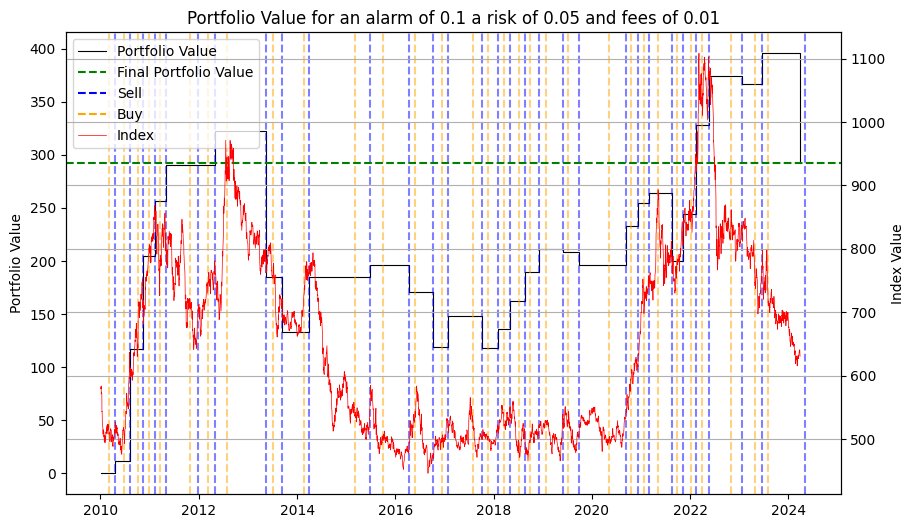

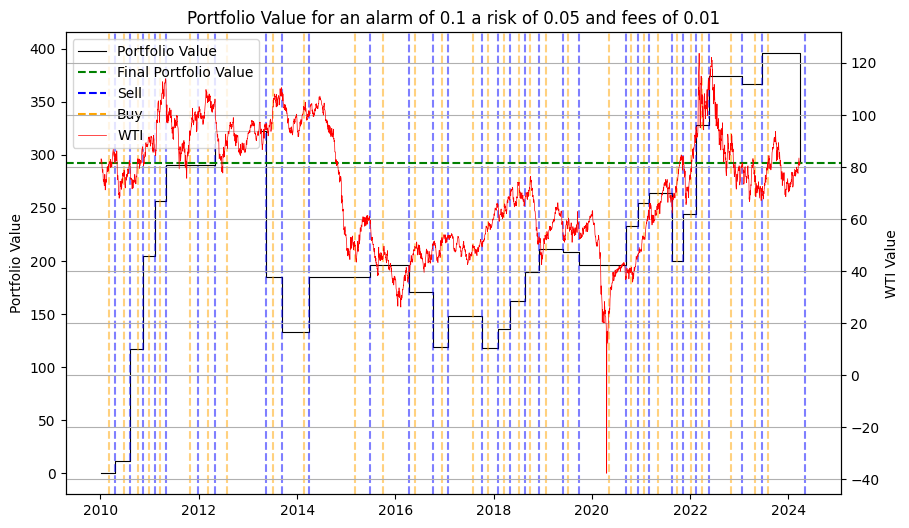

In [33]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_title(f'Portfolio Value for an alarm of {alarm} a risk of {risk} and fees of {fees}')
ax1.step(date_order, portfolio, linewidth=0.8, label="Portfolio Value", color="black", where='post')
ax1.set_ylabel('Portfolio Value')
for date in date_sell:
    ax1.axvline(x=date, color='blue', linestyle='--', alpha=0.5)
for date in date_buy:
    ax1.axvline(x=date, color='orange', linestyle='--', alpha=0.5)
ax2 = ax1.twinx()
ax2.plot(cereals_index['Date'], cereals_index['Valeur1'], color='red', label='Index', linewidth=0.5)
ax2.set_ylabel('Index Value')
ax1.axhline(portfolio[-1], color='green', linestyle='--', label='Final Portfolio Value')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines1.extend([plt.Line2D([0], [0], color='blue', linestyle='--'), plt.Line2D([0], [0], color='orange', linestyle='--')])
labels1.extend(['Sell', 'Buy'])
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.grid()
plt.show()

fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_title(f'Portfolio Value for an alarm of {alarm} a risk of {risk} and fees of {fees}')
ax1.step(date_order, portfolio, linewidth=0.8, label="Portfolio Value", color="black", where='post')
ax1.set_ylabel('Portfolio Value')
for date in date_sell:
    ax1.axvline(x=date, color='blue', linestyle='--', alpha=0.5)
for date in date_buy:
    ax1.axvline(x=date, color='orange', linestyle='--', alpha=0.5)
ax2 = ax1.twinx()
ax2.plot(cereals_index['Date'], WTI['Valeur1'], color='red', label='WTI', linewidth=0.5)
ax2.set_ylabel('WTI Value')
ax1.axhline(portfolio[-1], color='green', linestyle='--', label='Final Portfolio Value')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines1.extend([plt.Line2D([0], [0], color='blue', linestyle='--'),plt.Line2D([0], [0], color='orange', linestyle='--')])
labels1.extend(['Sell', 'Buy'])
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.grid()
plt.show()

## Graphique requis par le sujet

Dans cette partie on se propose d'implémenter les graphiques requis dans le sujet (ce projet ayant été réalisé un peu avant la parution de l'énnoncé exact)

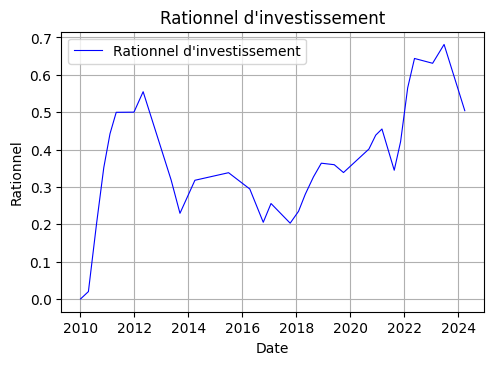

In [34]:
# Calcul du Rationnel d'investissement
investment_ratio = np.array(portfolio) / cereals_index['Valeur1'][0]

# Création des sous-plots pour les nouveaux graphiques
plt.figure(figsize=(12, 8))

# Graphique 1 : Rationnel d'investissement
plt.subplot(2, 2, 3)
plt.plot(date_order, investment_ratio, linewidth=0.8, label="Rationnel d'investissement", color="blue")
plt.title("Rationnel d'investissement")
plt.xlabel('Date')
plt.ylabel('Rationnel')
plt.grid()
plt.legend()

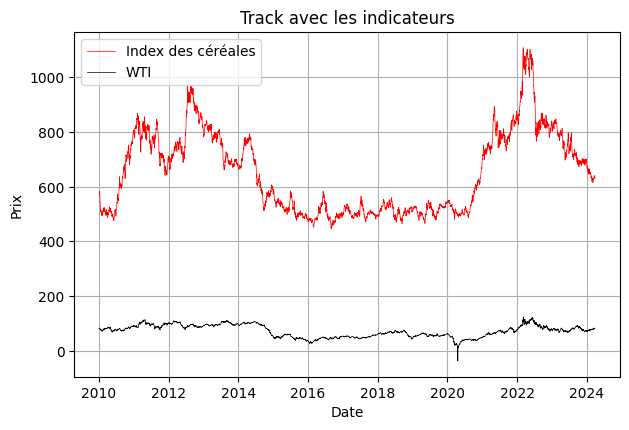

In [35]:
# Graphique 2 : Track avec les indicateurs
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 4)
# Ajoutez votre code pour ce graphique en utilisant les données appropriées
# Vous pouvez utiliser les données de cereals_index ou WTI, selon vos besoins
# Par exemple : 
plt.plot(cereals_index['Date'], cereals_index['Valeur1'], linewidth=0.5, label="Index des céréales", color="red")
plt.plot(WTI['Date'], WTI['Valeur1'], linewidth=0.5, label="WTI", color="black")
plt.title("Track avec les indicateurs")
plt.xlabel('Date')
plt.ylabel('Prix')
plt.grid()
plt.legend()

# Afficher les graphiques
plt.tight_layout()
plt.show()